In [1]:
import pickle
window_col = pickle.load(open('./data_saved/window_col.p','rb'))

In [2]:
import numpy as np
from scipy import signal
from scipy.stats import skew
import matplotlib.pyplot as plt
%matplotlib inline
def get_metric(x):
#     return np.std(np.abs(signal.hilbert(x)))
    f,pxx = signal.welch(x,fs=25,nperseg=50)
    pxx = np.abs(pxx)
    pxx = pxx/max(pxx)
    return np.trapz(pxx[np.where((f>.8)&(f<2.5))[0]])/np.trapz(pxx)
    
#     pxx1 = pxx[np.where(f>.8)[0]]
#     pxx2 = pxx[np.where((f>.8)&(f<2.5))[0]]
#     peaks_loc1,_ = signal.find_peaks(pxx1,height=.01)
#     peaks_loc2,_ = signal.find_peaks(pxx2,height=.01)
#     if len(peaks_loc1)==0 or len(peaks_loc2)==0:
#         return 0
# # #     plt.plot(x)
# # #     plt.title(h +'gg'+str(max(pxx2)/np.sum(pxx1)))
# # #     plt.show()
# # # #     return np.trapz(pxx[np.where((f>.8)&(f<2.5))[0]])/np.trapz(pxx)
#     return np.sum(pxx2[peaks_loc2])/np.sum(pxx1[peaks_loc1])
#     return max(pxx2)/np.sum(pxx1)
duration_col = []
std_col = []
std_col1 = []
for a in window_col:
    if (a[-1,0]-a[0,0])/1000<10*60:
        tmp = get_metric(a[:,4])
#         if tmp==0:
#             continue
        duration_col.append((a[-1,0]-a[0,0])/1000)
        a[:,5:8] = a[:,5:8]*2/16384
#         print(np.sqrt(np.sum(np.power(np.std(a[:,5:8],axis=1),2))).shape)
        std_col1.append(np.sqrt(np.sum(np.power(np.std(a[:,5:8],axis=0),2))))
        std_col.append(tmp)
#         std_col.append(skew(a[:,4]))

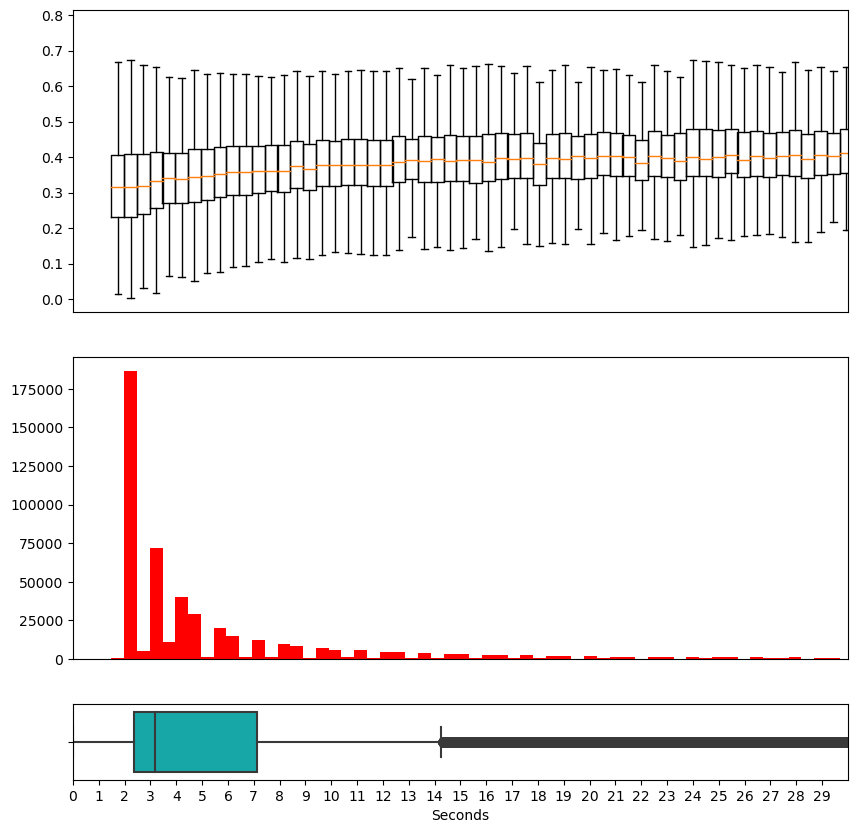

In [32]:
import numpy as np
duration_col1 = np.array(duration_col)
std_col = np.array(std_col)
std_col1 = np.array(std_col1)
# duration_col1 = duration_col1[duration_col1<30]
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.style('ggplot')
plt.style.use('default')
import seaborn as sns
fig,ax = plt.subplots(figsize=(10,10),nrows=3, ncols=1,sharex=False,gridspec_kw={'height_ratios': [4,4, 1]})
# ax[0].scatter(duration_col1,std_col1)
# ax[0].hist(duration_col1[np.where(std_col>.7)[0]],bins=200)
# ax[0].hist(duration_col1[np.where(std_col<.15)[0]],bins=200)
n,bins,patches = ax[1].hist(duration_col1,bins=1200,color="r",alpha=1)
# sns.scatterplot(x=duration_col1, y=std_col1,ax=ax[0])
x = []
y = []
y1 = []
for i in range(0,len(bins)-1,1):
    if (bins[i]+bins[i+1])/2 < 1.5:
        continue
    x.append((bins[i]+bins[i+1])/2)
    y.append(std_col[np.where((duration_col1>=bins[i])&(duration_col1<bins[i+1]))[0]])
    y1.append(std_col1[np.where((duration_col1>=bins[i])&(duration_col1<bins[i+1]))[0]])
# ax[0].boxplot(y1,positions=x,showfliers=False)
ax[0].boxplot(y,positions=x,showfliers=False)
# ax[0].scatter(duration_col1,std_col)
# sns.jointplot(x=duration_col1, y=np.array(std_col1),kind='kde',ax=ax[0])
# g = sns.JointGrid(x=duration_col1, y=np.array(std_col))            # Initiate multi-plot
# g.plot_joint(sns.kdeplot,ax=ax[0])
    # ax[0].set_ylim([0,60000])
ax[1].set_xlim([0,30])
# plt.setp(ax[1], xticks=[i for i in range(30)], 
#          xticklabels=[str(i) for i in range(30)])
plt.setp(ax[2],xticks=[i for i in range(30)],
         xticklabels=[str(i) for i in range(30)],xlabel='Seconds')
# plt.setp(ax[2], xticks=[i for i in range(30)], 
#          xticklabels=[str(i) for i in range(30)])
ax[0].set_xlim([0,30])
# ax[0].set_xlim([0,30])
ax[0].set_xticks([])
# ax[0].set_xticks([])
ax[1].set_xticks([])
# ax[0].set_xticks([])
# ax[2].set_xlabel('Histogram of Segment durations in seconds,Boxplot below shows the Percentiles')
# ax[2].set_ylabel('No. of Segments')
ax[2].set_xlim([0,30])
sns.boxplot([duration_col1], ax=ax[2],color='c',showfliers=True)
# sns.kdeplot(duration_col1,bw=3, ax=ax[1],color='c',shade=True)
plt.savefig('./data_saved/relative_peak_power_dist23.pdf',dps=1000)
# plt.savefig('./data_saved/relative_peak_power_dist22.eps',dps=20000000)
# plt.legend()
plt.show()

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes(duration_col,xticklabels=[])
ax2 = fig.add_axes(duration_col)
ax1.plot(duration_col,bins=1600)
# plt.ylim([0,75000])
# plt.xlim([0,40])
# plt.xticks([])
# plt.subplot(2,1,2)
ax2.boxplot(duration_col,vert=False,showfliers=False)
%matplotlib notebook
import matplotlib.pyplot as plt

In [ ]:
%matplotlib notebook
plt.scatter(duration_col1,std_col1,c=std_col)
plt.colorbar()
plt.show()

In [ ]:
import scipy
scipy.stats.mode(duration_col1)

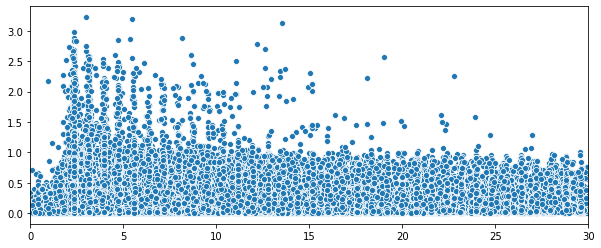

In [43]:
%matplotlib inline
plt.figure(figsize=(10,4))
sns.scatterplot(x=duration_col1, y=std_col1)
# sns.jointplot(x=duration_col1, y=std_col1,kind='reg')

plt.xlim([0,30])
# plt.colorbar()
plt.savefig('./data_saved/relative_peak_power_dist24.png',dps=10000)
plt.show()